In [1]:
#k-prototypes para datos con numerico y categorias

In [2]:
import pandas as pd
df = pd.read_csv('/Users/Owner/Desktop/age_education.csv', sep=',')

df

,age,education
0,27.007219,college
1,47.615409,highschool
2,51.382815,highschool
3,54.906622,highschool
4,27.719939,less_than_highschool
...,...,...
995,57.550481,less_than_highschool
996,23.726849,college
997,52.828647,highschool
998,54.411223,highschool


In [3]:
df['z_age'] = (df['age']-df['age'].mean())/df['age'].std()

In [4]:
from kmodes.kprototypes import KPrototypes

X = df[['z_age', 'education']].values
kp = KPrototypes(n_clusters=3)
df['cluster'] = kp.fit_predict(X, categorical=[1])
X = df[['z_age', 'education']].values
kp = KPrototypes(n_clusters=3)
df['cluster'] = kp.fit_predict(X, categorical=[1])
                               

In [5]:
df = pd.concat([df,pd.get_dummies(df['education'])],axis=1)
df

,age,education,z_age,cluster,college,highschool,less_than_highschool
0,27.007219,college,-1.446258,1,1,0,0
1,47.615409,highschool,0.438698,0,0,1,0
2,51.382815,highschool,0.783290,0,0,1,0
3,54.906622,highschool,1.105599,0,0,1,0
4,27.719939,less_than_highschool,-1.381068,1,0,0,1
...,...,...,...,...,...,...,...
995,57.550481,less_than_highschool,1.347424,2,0,0,1
996,23.726849,college,-1.746302,1,1,0,0
997,52.828647,highschool,0.915534,0,0,1,0
998,54.411223,highschool,1.060287,0,0,1,0


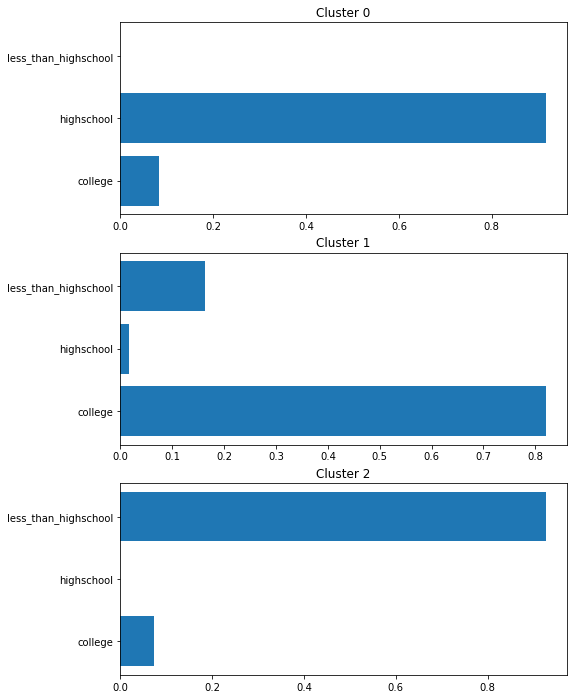

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,12))
for i in range(3):
  cluster_df = df[df['cluster'] == i]
  means = cluster_df[['college','highschool','less_than_highschool']].mean()
  ax = plt.subplot(3, 1, i+1)
  plt.barh([1,2,3],means)
  ax.set_yticks([1,2,3])
  ax.set_yticklabels(['college','highschool','less_than_highschool'])
  ax.set_title('Cluster ' + str(i))
plt.show()
